In [1]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection, FeatureLayer

In [2]:
gis = GIS(profile='playfround_portal_admin')

<Item title:"fortune_500_styled_wfl" type:Feature Layer Collection owner:andrew>
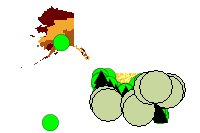

In [3]:
flc_item = gis.content.search('title:fortune_500_styled_wfl', 'Feature Layer')
flc_item[0]

In [4]:
flc= FeatureLayerCollection.fromitem(flc_item[0])
flc

<FeatureLayerCollection url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer">

## turn back new york

In [5]:
fl0 = flc.layers[0]
fl0

<FeatureLayer url:"http://python.playground.esri.com/server/rest/services/Hosted/fortune_500_styled_880c700a3753428587848281777012f9/FeatureServer/0">

In [6]:
fset = fl0.query()
feats = fset.features

In [7]:
fset.df.head(5)

,feature,globalid,name,objectid,pop,SHAPE
0,"Population greater than 999,999 County Seat",{EBB04276-5FEC-4CC5-AA3D-39F0833AEC95},Los Angeles,1,3485398.0,"{'x': -13162974.851300001, 'y': 4035820.211800..."
1,"Population greater than 999,999 County Seat",{73C9B31E-7749-41A3-B2BA-1C7F50FCA23F},San Diego,2,1110549.0,"{'x': -13041954.6204, 'y': 3857562.1829999983,..."
2,"Population greater than 999,999 County Seat",{918E688F-4D5D-4EC3-8B4B-6AD1FA3FDF7C},Philadelphia,4,1585577.0,"{'x': -8367174.4026, 'y': 4859017.708499998, '..."
3,"Population greater than 999,999 County Seat",{9F4E803A-DDBD-486A-AE9A-A1660C5E41FD},Dallas,5,1006877.0,"{'x': -10775794.1317, 'y': 3866612.282399997, ..."
4,"Population greater than 999,999 County Seat",{438FE1CF-4F35-44CA-9A67-FD8E863F2249},Houston,6,1630553.0,"{'x': -10615848.7424, 'y': 3473191.150200002, ..."


In [8]:
ny_feature = [f for f in feats if f.attributes['name']=='New York City'][0]
ny_feature.attributes

{'objectid': 12,
 'feature': 'Population greater than 999,999   County Seat',
 'name': 'New York City',
 'pop': 7322564.0,
 'globalid': '{C3E55B40-C33F-4AF3-8F6F-6B7596D1F980}'}

In [9]:
import copy
ny_edit = copy.deepcopy(ny_feature)
ny_edit.attributes['name'] = 'New York'

In [10]:
update_result = fl0.edit_features(updates=[ny_edit])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 12,
   'globalId': '{C3E55B40-C33F-4AF3-8F6F-6B7596D1F980}',
   'success': True}],
 'deleteResults': [],
 'attachments': {'addResults': [], 'updateResults': [], 'deleteResults': []}}

# Managing Capability

In [11]:
flc.properties.capabilities

'Query,Editing,Create,Update,Delete'

In [12]:
flc.manager.update_definition({'capabilities':"Query"})

{'success': True}

In [13]:
flc.properties.capabilities

'Query'

In [14]:
flc.manager.update_definition({'capabilities':"Query,Editing,Create,Update,Delete"})

{'success': True}

In [15]:
flc.properties.capabilities

'Query,Editing,Create,Update,Delete'